#  I have faced few chnallenges while running the code. 
* I also have provided the results for each step of the challenges I faced and craeted the correct code step by step. 

# Happy Coding with Bertopic :) 



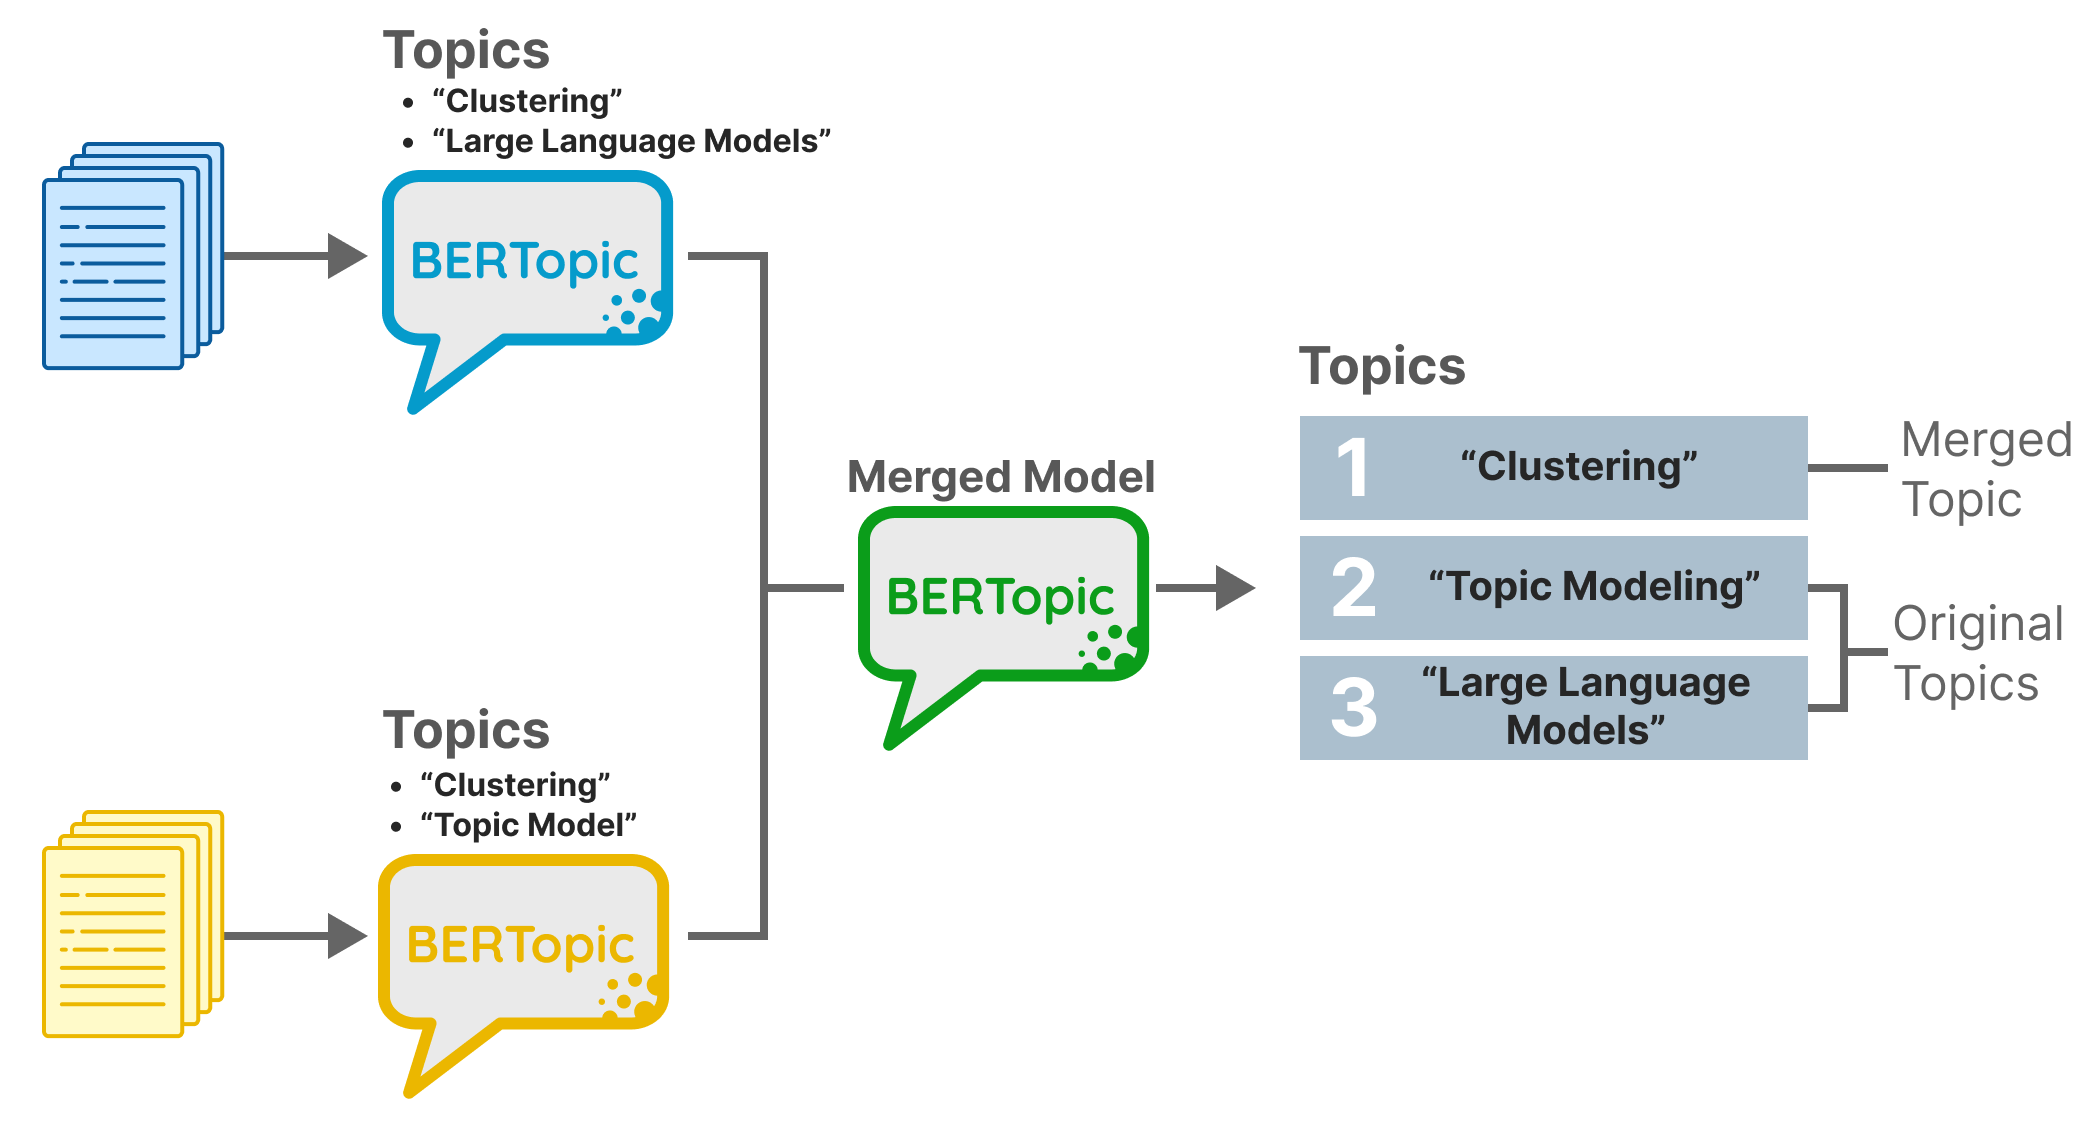

In [8]:
pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 42.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 45.6 MB/s eta 0:00:00:00:01
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.3 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Import necessary libraries

from sklearn.datasets import fetch_20newsgroups




2024-07-02 15:56:39.004327: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 15:56:39.004400: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 15:56:39.006102: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [1]:
# Load your dataset
import pandas as pd
import numpy as np 
file_path = "/kaggle/input/spotify-reviews-playstore-daily-update/spotify_reviews.csv"
data = pd.read_csv(file_path)


try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Check if the 'content' column exists
if 'content' not in data.columns:
    print("Error: 'content' column not found in the dataset.")
    exit()

# Drop missing values and convert to list
documents = data['content'].dropna().tolist()

# Ensure that the documents list is not empty
if not documents:
    print("Error: No valid documents found in the 'content' column.")
    exit()
# Check if the 'review' column exists
if 'content' not in data.columns:
    print("Error: 'content' column not found in the dataset.")
    exit()





Dataset loaded successfully.
Dataset loaded successfully.


In [3]:
from sentence_transformers import SentenceTransformer
# Load a pre-trained SentenceTransformer model
model = SentenceTransformer("all-MiniLM-L6-v2")



/opt/conda/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
2024-07-02 16:00:57.392486: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 16:00:57.392576: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 16:00:57.394503: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
from bertopic import BERTopic
# Initialize BERTopic with the SentenceTransformer model
topic_model = BERTopic(embedding_model=model)



# Challenge Resolved: ValueError: This BERTopic instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Fit the topic model
try:
    topics, probabilities = topic_model.fit_transform(documents)
    print("BERTopic model fitted successfully.")
except Exception as e:
    print(f"Error fitting BERTopic model: {e}")
    exit()

In [ ]:
# Print out the topics
for topic, freq in topic_model.get_topic_freq().iterrows():
    if topic == -1:
        continue  # Skip outlier topic
    print(f"Topic {topic} has {freq['Frequency']} documents")

In [ ]:
# Get the most frequent topic
most_frequent_topic = topic_model.get_topic(topic_model.get_topic_freq().iloc[1].Topic)
print(f"The most frequent topic is: {most_frequent_topic}")



In [ ]:
# Visualize the topics
topic_model.visualize_topics()



In [ ]:
# Save the model
topic_model.save("bertopic_model")


In [ ]:
# Load the model
loaded_model = BERTopic.load("bertopic_model")

In [ ]:
# Select a subset of new documents (for example, the next 10 reviews)
new_documents = data['review'].dropna().iloc[100:110].tolist()

# Ensure the new documents list is not empty
if not new_documents:
    print("Error: No valid new documents found in the 'review' column for the selected range.")
    exit()



In [ ]:
# Transform new documents
try:
    new_topics, new_probs = loaded_model.transform(new_documents)
    print("New documents transformed successfully.")
except Exception as e:
    print(f"Error transforming new documents: {e}")
    exit()

# Print new topics for the subset of new documents
for doc, topic in zip(new_documents, new_topics):
    print(f"Document: {doc[:100]}... -> Topic: {topic}")
